In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

#import keras
from keras.models import Sequential
from keras.layers import Dense
#plot
from matplotlib import pyplot as plt

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/7th sem/NNFLL/BankNoteAuthentication.csv', sep=',')
X=dataset.iloc[:, 0:-1].values
y=dataset.iloc[:, -1].values

In [ ]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [ ]:
dataset

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
X

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
dataset.shape

(1372, 5)

In [ ]:
X.shape

(1372, 4)

In [ ]:
y.shape

(1372,)

In [ ]:
X

array([[1106., 1068.,  198.,  652.],
       [1249., 1042.,  220.,  424.],
       [1146.,  285.,  800.,  803.],
       ...,
       [ 100.,    4., 1266.,  277.],
       [ 119.,   66., 1240.,  451.],
       [ 211.,  359.,  903., 1082.]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#test train splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 0)

In [ ]:
#feature scale
#a method used to normalize the range of independent variables / features of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
#keras define
model = Sequential()
model.add(Dense(8,input_dim=4, activation='relu')) 
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='sigmoid')) 
#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=50,batch_size=5)

Epoch 1/50
192/192 [==============================] - 1s 1ms/step - loss: 0.6434 - accuracy: 0.6375
Epoch 2/50
192/192 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7365
Epoch 3/50
192/192 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8188
Epoch 4/50
192/192 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8958
Epoch 5/50
192/192 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9563
Epoch 6/50
192/192 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9802
Epoch 7/50
192/192 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9823
Epoch 8/50
192/192 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9906
Epoch 9/50
192/192 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9906
Epoch 10/50
192/192 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9937

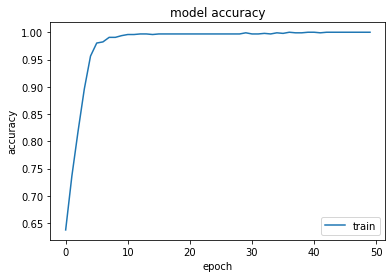

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for Training and Validation accuracy
from matplotlib import pyplot as plt
plt.plot(history.history ['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.savefig('accuracy_curve.png')

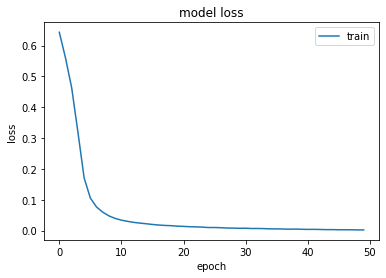

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot for training loss
plt.plot(history.history ['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

In [ ]:
history_test = model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 1.0000


In [ ]:
history_test


[0.001255334122106433, 1.0]